 # Dependencies


In [1]:
import os
import sys
import numpy as np
from matplotlib import rcParams

sys.path.insert(0,'/LedsaCamControl')
from ledsacamcontrol import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/Users/kristianboerger/repos/PhD/LedsaDataCollect')
from datacollect import *

# Config

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 1

# Data

finding led search areas
mean pixel value: 2.0140273896123633
max pixel value: 9734
Saturation: 0.5941162109375

found 0 leds


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

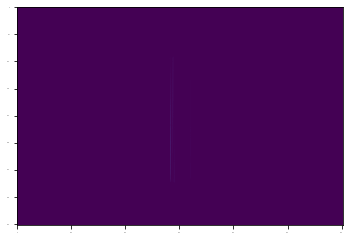

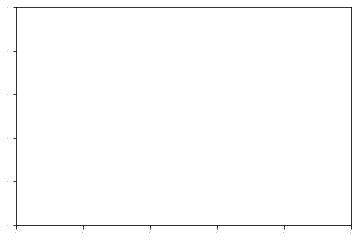

In [3]:
dataset_name = 'mirex_vs_led'
ref_image = '/Volumes/N-1/22_04_29/canon_2/IMG_3020'
image_dir = '/Volumes/N-1/22_04_28/canon_3'

calib = TimeSeries(local_images=True)
calib.datatype ='CR2'
calib.find_leds(channel='all', radius=5, threshold_factor=1, skip=20, filename=ref_image)

calib.plot_ref_image()
calib.plot_leds(dataset_name, crop_image=False)
plt.show()

In [4]:
calib.set_img_name_string(img_name_string='IMG_{:04d}.CR2', img_dir=image_dir)
limit = 9999
calib.set_images_series(6435, 7860, limit=limit, skip=5)

In [5]:
calib.write_channel_values_to_file(dataset_name)

Processing files
6435 6440 6445 6450 6455 6460 6465 6470 6475 6480 6485 6490 6495 6500 6505 6510 6515 6520 6525 6530 6535 6540 6545 6550 6555 6560 6565 6570 6575 6580 6585 6590 6595 6600 6605 6610 6615 6620 6625 6630 6635 6640 6645 6650 6655 6660 6665 6670 6675 6680 6685 6690 6695 6700 6705 6710 6715 6720 6725 6730 6735 6740 6745 6750 6755 6760 6765 6770 6775 6780 6785 6790 6795 6800 6805 6810 6815 6820 6825 6830 6835 6840 6845 6850 6855 6860 6865 6870 6875 6880 6885 6890 6895 6900 6905 6910 6915 6920 6925 6930 6935 6940 6945 6950 6955 6960 6965 6970 6975 6980 6985 6990 6995 7000 7005 7010 7015 7020 7025 7030 7035 7040 7045 7050 7055 7060 7065 7070 7075 7080 7085 7090 7095 7100 7105 7110 7115 7120 7125 7130 7135 7140 7145 7150 7155 7160 7165 7170 7175 7180 7185 7190 7195 7200 7205 7210 7215 7220 7225 7230 7235 7240 7245 7250 7255 7260 7265 7270 7275 7280 7285 7290 7295 7300 7305 7310 7315 7320 7325 7330 7335 7340 7345 7350 7355 7360 7365 7370 7375 7380 7385 7390 7395 7400 7405 7410 741

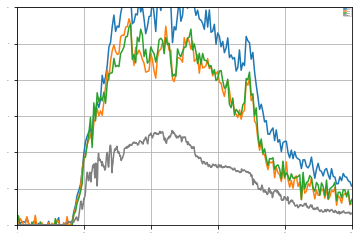

In [10]:

data_max = pd.read_csv("max_mirex_vs_led.csv",header=[0,1], index_col=0)
data_mean = pd.read_csv("mean_mirex_vs_led.csv",header=[0,1], index_col=0)
data_integral = pd.read_csv("integral_mirex_vs_led.csv",header=[0,1], index_col=0)
# display(data)
time = np.arange(len(data_max.index)) * 5 - 300
values_max = data_max['0','0']
values_mean = data_mean['0','14']
for led, channel, multiplicator in zip([29, 169, 200], [0, 1, 2], [1,1,1]):

    values_integral = data_integral[f'{channel}',f'{led}']

    ref_value = values_integral[30:40].mean()
    T = values_integral/ref_value
    sigma = (- np.log(T) / 1)/ multiplicator
    plt.plot(time, sigma, label= 'integral')

plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 0.3)
plt.grid()